# 自定义Matplotlib样式

> 样式： 就是定义图形、字体、线条等一切可以美化的元素的公式；说人话就是：你定义好一个公式A，A中定义线条的颜色是红色；现在画图的时候你需要美化一个线条；就直接使用这个公式；线条就变成了红色；这样说的话样式也就相当于一种画图的风格。

matplot支持两种修改样式的方式：
+ 使用样式表
+ 使用rcParams

### 这两种修改样式的方式有啥区别呢？

样式表的方式是通过加载样式文件，来修改matplotlib中默认的绘图风格；加载了文件后只在当前环境生效，下次要用还得重新加载。而rcParams则是直接修改matplotlib的默认配置，一劳永逸。

下面就用代码来看看具体的效果吧。

来解读一下具体代码的作用

为了方便比较，我使用了`subplot`函数生成两个子图，函数内部参数不懂的可以看我之前写的一篇`pyplot`对象的文章。
默认情况下，matplotlib中加载自定义样式时是对全局生效的，如果你只想在某个地方使用这个样式就得像我这样

```python
with plt.style.context('fivethirtyeight'):
    plt.plot(data)
    plt.title('fivethirtyeight style')
    plt.grid(True)

```
通过比较可以发现，再使用了系统中的定义的一个样式后，线条明显变粗了

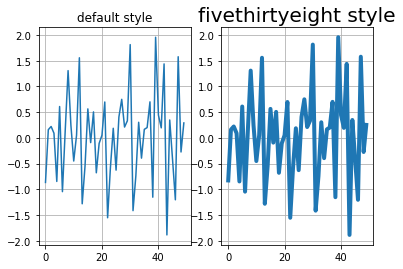

In [15]:
##使用系统默认的样式
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl   ##因为要修改样式所有matplotlib都得引入
from cycler import cycler
plt.figure() ##生成一块画布
data = np.random.randn(50) ##绘图数据

plt.subplot(121) ##绘制系统默认的样式

plt.plot(data)
plt.title("default style")
plt.grid(True)
plt.subplot(122) ##绘制系统样式
with plt.style.context('fivethirtyeight'):
    plt.plot(data)
    plt.title('fivethirtyeight style')
    plt.grid(True)

### 使用系统定义的样式

使用这个`print(plt.style.available)`函数可以打印中吗，matplotlib中预先定义好的一些样式。
哇哦惊讶的发现我无敌`ggplot`样式竟然在里面
```python
['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
```

### 定义你的样式文件

知道了如何使用样式文件来批量美化图片后，接下来就是定义你自己的一套审美啦。样式文件的格式采用的是键值对的形式，如下所示
```python
axes.titlesize : 24
axes.labelsize : 20
lines.linewidth : 3
lines.markersize : 10
xtick.labelsize : 16
ytick.labelsize : 16
```

在定义好之后，只需要加上文件路径就可以使用，这里我还没测试不知道文件是不是必须得用`mplstyle`为后缀；我觉得应该不需要

```python
>>> import matplotlib.pyplot as plt
>>> plt.style.use('./images/presentation.mplstyle')
```

### 组合多个样式文件

美化图片也可以变成和搭积木一样，比如把线条的美化存成一个`line.mplstyle`文件，背景的美化存成`background.mplstyle`文件；这样当你有多个这个的文件的时候就可以同过组合起来，构成一个独特的样式啦
```python
with plt.style.context('dark_background','ggplot'):  ##只在局部环境生效
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')
plt.show()
```

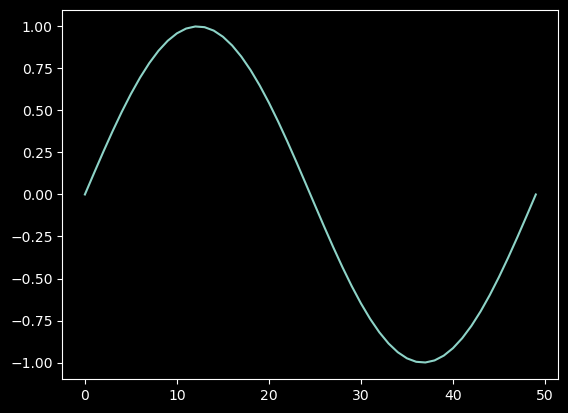

In [23]:
with plt.style.context('dark_background','ggplot'):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)))
plt.show()

### rcParams修改系统默认样式

这个操作时对所有环境都生效的哟，如果你觉得matplotlib的默认样式太丑了，恰巧你想修改它的样式并且想在每次画图都自动的使用你设置好的样式，那就可以考虑用它了

设置的方式也非常的简单
```python
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
plt.plot(data)
```

如果你想重置之前的配置的话，可以使用函数`matplotlib.rcdefaults()`进行重置。

### 关于样式文件的位置

这个东西用的不多，仅仅了解一下就可以了

如果想像使用系统中自定义样式文件那样引入样式文件而不使用路径的话`plt.style.context('ggplot')`，只需要把你的为文件存在这个目录下即可` ~/.config/matplotlib/stylelib/`,文件的命名也有讲究和系统的命令类似即可。
系统rcParams中默认的样式文件，存储在`~/.config/matplotlib/matplotlibrc`这个文件内；喜欢折腾的可以改改这个文件。
```python
```
